# [Data available here!](https://drive.google.com/drive/folders/1udwDhhMp7w-j73two-QFg5TnavJuzl7j)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dipy.data import fetch_tissue_data, read_tissue_data
from dipy.segment.tissue import TissueClassifierHMRF
import nibabel as nib
from util import *

### Visualizing Axial and Coronal slides

In [ ]:
img = nib.load('./datos/100206/T1w/T1w_acpc_dc_restore_brain.nii.gz')
t1 = img.get_data()

In [ ]:
fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1, 2, 1)
img_ax = np.rot90(t1[..., 89])
imgplot = plt.imshow(img_ax, cmap="gray")
a.axis('off')
a.set_title('Axial')

a = fig.add_subplot(1, 2, 2)
img_cor = np.rot90(t1[:, 128, :])
imgplot = plt.imshow(img_cor, cmap="gray")
a.axis('off')
a.set_title('Coronal')

### Defining hyperparameters 
We will consider three classes, namely 
- corticospinal fluid (CSF)
- white matter (WM) 
- gray matter (GM)

These classes defines the labels for which each pixel will belong

In [5]:
nclass = 3
beta = 0.1

### Fiting the model

In [6]:
import time
t0 = time.time()

hmrf = TissueClassifierHMRF()
initial_segmentation, final_segmentation, PVE = hmrf.classify(t1, nclass, beta)

t1 = time.time()
total_time = t1-t0
print('Total time:' + str(total_time))

>> Iteration: 0
>> Iteration: 1
>> Iteration: 2
>> Iteration: 3
>> Iteration: 4
>> Iteration: 5
>> Iteration: 6
>> Iteration: 7
>> Iteration: 8
>> Iteration: 9
>> Iteration: 10
>> Iteration: 11
>> Iteration: 12
>> Iteration: 13
>> Iteration: 14
>> Iteration: 15
>> Iteration: 16
>> Iteration: 17
>> Iteration: 18
>> Iteration: 19
>> Iteration: 20
Total time:442.877497911


### Reading the image reference

In [59]:
img = nib.load('./datos/100206/T1w/aparc+aseg.nii.gz')
t2 = img.get_data()
t2.shape

(260, 311, 260)

### Extracting gray and white reference matter

In [162]:
dice_max = 0
dice_max_l = 0
dice_max_r = 0
matches = []
for i in range(0,final_segmentation.shape[2]):
    #getting whole brain slide
    wholenewbrain, whole_brain = get_whole_brain(i, t2, final_segmentation)
    #matching
    dice, A_B = get_score(wholenewbrain, whole_brain)
    matches.append(A_B)
    if dice > dice_max:
        dice_max = dice
        model = wholenewbrain
        real = whole_brain
        n_slide = i

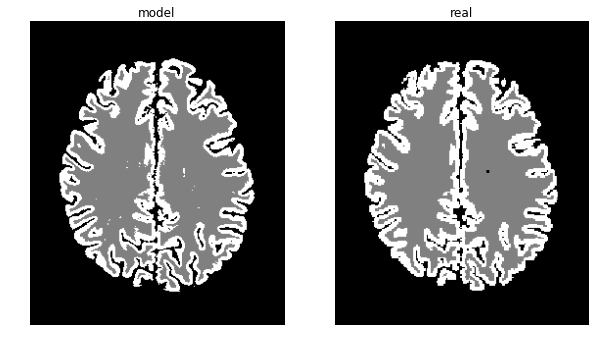

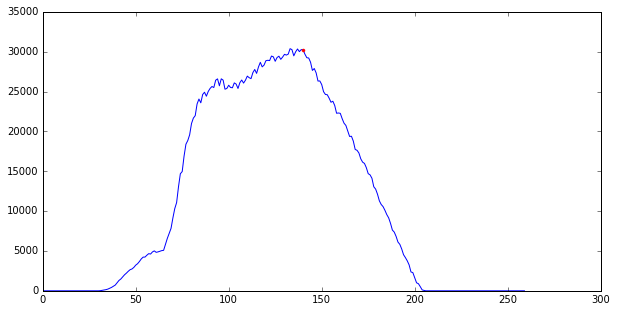

max value: ( 140 , 30227 )


In [165]:
fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(model, cmap="gray")
a.axis('off')
a.set_title('model')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(real, cmap="gray")
a.axis('off')
a.set_title('real')

fig2 = plt.figure(figsize=(10,5))
plt.plot(matches)
plt.plot(n_slide, matches[n_slide], 'r.')
plt.show()

print 'max value: (',n_slide,',',matches[n_slide],')'

### For each slide in the segmented image we'll calculate Dice's score

In [156]:
lef, rig = get_hemispheres(n_slide,t2)

In [157]:
model_l = np.where(model==lef, 1, 0)*lef
model_r = np.where(model==rig, 1, 0)*rig
model_l = model_l[model_l!=0]
model_r = model_r[model_r != 0]

lef_ = lef[lef != 0]
rig_ = rig[rig != 0]

dice2 = (model_l.shape[0]*2.0 )/ (lef_.shape[0] + model_l.shape[0])
dice3 = (model_r.shape[0]*2.0 )/ (rig_.shape[0] + model_r.shape[0])

In [158]:
print 'Sorensen-Dice for whole brain: ',dice_max
print 'Sorensen-Dice for left side: ',dice2
print 'Sorensen-Dice for right side: ',dice3


Sorensen-Dice for whole brain:  0.934345151618
Sorensen-Dice for left side:  0.960107747563
Sorensen-Dice for right side:  0.959589924211
